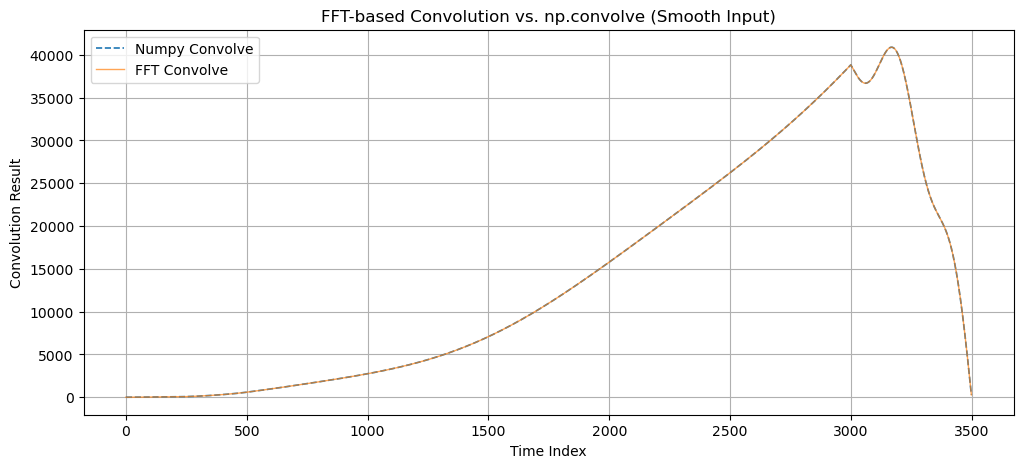

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from brick import fft_convolve_multidim

# 参数设置
L1 = 3000
L2 = 500

# 构造平滑函数：多项式 + 三角函数
x1 = np.linspace(0, 4 * np.pi, L1)
x2 = np.linspace(0, 4 * np.pi, L2)

a_np = (0.5 * x1 ** 2 + np.sin(x1)).reshape(-1, 1)  # [L1, 1]
b_np = (np.cos(x2) + 0.2 * x2).reshape(-1, 1)  # [L2, 1]

a_torch = torch.tensor(a_np, dtype=torch.float32)
b_torch = torch.tensor(b_np, dtype=torch.float32)

# 计算卷积
out_fft = fft_convolve_multidim(a_torch, b_torch, sum_dim=True).numpy()
out_np = np.convolve(a_np[:, 0], b_np[:, 0], mode="full")

# 绘图对比
plt.figure(figsize=(12, 5))
plt.plot(out_np, label="Numpy Convolve", linestyle="dashed", linewidth=1.2)
plt.plot(out_fft, label="FFT Convolve", alpha=0.7, linewidth=1)
plt.title("FFT-based Convolution vs. np.convolve (Smooth Input)")
plt.xlabel("Time Index")
plt.ylabel("Convolution Result")
plt.grid(True)
plt.legend()
plt.show()
